### 2019 Index of Economic Freedom

### Description
2019 Index of Economic Freedom – Problem Statement<br>

<B>Background:</B>
Created in 1995 by the Heritage Foundation, The Index of economic freedom, is a ranking created to
measure the economic freedom in the countries of the world. Now, in its 25 th edition, The Economic
Freedom Index is poised to help readers track over two decades of the advancement in economic
freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities.
The Index covers 12 freedoms – from property rights to financial freedom – in 186 countries.<br>
Source of the data:<br>
This dataset belongs to The Heritage Foundation: https://www.heritage.org/index. This dataset is
freely available to download on their website.<br>

<B>Data Set:</B><br>
The data (last updated 26/02/2019) is presented in CSV format as follows:
CountryID, Country Name, WEBNAME, Region, World Rank, Region Rank, 2019 Score, Property
Rights, Judical Effectiveness, Government Integrity, Tax Burden, Gov&#39;t Spending, Fiscal Health,
Business Freedom, Labor Freedom, Monetary Freedom, Trade Freedom, Investment Freedom,
Financial Freedom, Tariff Rate (%), Income Tax Rate (%), Corporate Tax Rate (%), Tax Burden % of
GDP, Gov&#39;t Expenditure % of GDP , Country, Population (Millions), &quot;GDP (Billions, PPP)&quot;, GDP Growth
Rate (%), 5 Year GDP Growth Rate (%), GDP per Capita (PPP), Unemployment (%), Inflation (%), FDI
Inflow (Millions), Public Debt (% of GDP)
All these features are self-explanatory and the learners can research more on the same here.

Apply the concepts and techniques you have learned in the previous weeks to clusters countries based on variables that indicates freedom index and derive insights and make some business recommendations

#### Importing necessary libraries

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import re
import warnings
from PIL import Image
from scipy.stats import zscore
import os
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import seaborn as sns
%matplotlib inline
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

In [111]:
# Reading the dataset 
df = pd.read_csv("economic_freedom_index2019_data.csv")
extra = {'Bold': '\x1b[1m',
         'Underline': '\x1b[4m',
         'Blue': '\x1b[94m',
         'End': '\x1b[0m'}
seed = 1729

In [31]:
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [32]:
df.T.head(34)

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
CountryID,1,2,3,4,5,6,7,8,9,10,...,174,175,176,177,178,179,180,181,182,183
Country Name,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
WEBNAME,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,UnitedKingdom,UnitedStates,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Region,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Americas,Europe,Asia-Pacific,Europe,Asia-Pacific,Americas,...,Europe,Americas,Americas,Asia-Pacific,Asia-Pacific,Americas,Asia-Pacific,Middle East and North Africa,Sub-Saharan Africa,Sub-Saharan Africa
World Rank,152.0,52.0,171.0,156.0,148.0,47.0,5.0,31.0,60.0,76.0,...,7.0,12.0,40.0,140.0,116.0,179.0,128.0,NaN,138.0,175.0
Region Rank,39.0,27.0,14.0,33.0,26.0,24.0,4.0,16.0,13.0,15.0,...,3.0,2.0,6.0,36.0,26.0,32.0,30.0,NaN,27.0,45.0
2019 Score,51.5,66.5,46.2,50.6,52.2,67.7,80.9,72.0,65.4,62.9,...,78.9,76.8,68.6,53.3,56.4,25.9,55.3,NaN,53.6,40.4
Property Rights,19.6,54.8,31.6,35.9,47.8,57.2,79.1,84.2,59.1,42.2,...,92.3,79.3,68.3,49.8,65.9,7.6,49.8,19.6,45.0,29.7
Judical Effectiveness,29.6,30.6,36.2,26.6,44.5,46.3,86.5,71.3,53.1,46.9,...,85.9,78.6,58.9,34.3,36.4,13.1,40.3,22.2,35.6,24.8
Government Integrity,25.2,40.4,28.9,20.5,33.5,38.6,79.9,77.4,44.7,43.7,...,83.8,77.4,69.2,25.2,51.9,7.9,34.0,20.3,32.3,15.8


Country Name, WEBNAME, and Country are referencing the same thing, so drop country name and webname and move country variable to second position of the data set.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

In [34]:
drop_colums = ['Country Name','WEBNAME']
data = df.drop(columns=drop_colums)

In [35]:
data.head()

,CountryID,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [36]:
# lets check duplicate observations
data.duplicated().sum()

0

* No Duplicate Data

#### Lets take a look at summary of the data

In [37]:
data.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
count,186.000000,180.000000,180.000000,180.000000,185.000000,185.000000,185.000000,180.000000,183.000000,183.000000,...,181.000000,182.000000,183.000000,183.000000,179.000000,182.000000,184.000000,183.000000,182.000000,182.000000
mean,93.500000,90.500000,20.538889,60.768333,52.327568,44.899459,41.470270,77.212778,64.203825,65.996721,...,48.784530,5.986813,28.183060,23.891257,22.157542,33.863736,3.470109,2.984153,10.586264,56.469231
std,53.837719,52.105662,12.738611,11.255725,19.608526,18.104745,19.793193,13.208314,23.150984,31.764160,...,19.483982,5.533568,13.374339,8.858207,10.152671,15.476484,5.835732,2.926503,80.507501,34.163855
min,1.000000,1.000000,1.000000,5.900000,7.600000,5.000000,7.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.600000,10.600000,-14.000000,-16.100000,-0.900000,0.000000
25%,47.250000,45.750000,9.750000,53.950000,37.000000,31.000000,27.200000,70.975000,51.700000,39.900000,...,30.000000,2.000000,20.000000,20.000000,14.250000,24.675000,1.800000,1.900000,1.300000,34.950000
50%,93.500000,90.500000,19.500000,60.750000,50.100000,42.900000,35.500000,78.050000,68.800000,80.300000,...,50.000000,4.300000,30.000000,25.000000,20.700000,32.350000,3.200000,3.000000,2.750000,49.900000
75%,139.750000,135.250000,31.000000,67.800000,65.900000,54.700000,50.300000,85.425000,82.600000,91.450000,...,60.000000,8.775000,35.000000,30.000000,29.850000,40.225000,4.650000,4.450000,5.450000,70.125000
max,186.000000,180.000000,47.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,...,90.000000,50.000000,60.000000,50.000000,47.000000,139.200000,70.800000,9.900000,1087.500000,236.400000


In [38]:
# checking missing values
data.isna().sum()

CountryID                      0
Region                         0
World Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
Country                        0
Population (Millions)          0
GDP (Billions, PPP)            1
GDP Growth Rate (%)            2
5 Year GDP Growth Rate (%)     3
GDP per Capita (PPP)           2
Unemployment (%)               5
Inflation (%)                  4
FDI Inflow

* Few variables have missing values

In [39]:
first_col = data.pop('Country')
data.insert(1, 'Country', first_col)
data.T.head(32)

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
CountryID,1,2,3,4,5,6,7,8,9,10,...,174,175,176,177,178,179,180,181,182,183
Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Region,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Americas,Europe,Asia-Pacific,Europe,Asia-Pacific,Americas,...,Europe,Americas,Americas,Asia-Pacific,Asia-Pacific,Americas,Asia-Pacific,Middle East and North Africa,Sub-Saharan Africa,Sub-Saharan Africa
World Rank,152.0,52.0,171.0,156.0,148.0,47.0,5.0,31.0,60.0,76.0,...,7.0,12.0,40.0,140.0,116.0,179.0,128.0,NaN,138.0,175.0
Region Rank,39.0,27.0,14.0,33.0,26.0,24.0,4.0,16.0,13.0,15.0,...,3.0,2.0,6.0,36.0,26.0,32.0,30.0,NaN,27.0,45.0
2019 Score,51.5,66.5,46.2,50.6,52.2,67.7,80.9,72.0,65.4,62.9,...,78.9,76.8,68.6,53.3,56.4,25.9,55.3,NaN,53.6,40.4
Property Rights,19.6,54.8,31.6,35.9,47.8,57.2,79.1,84.2,59.1,42.2,...,92.3,79.3,68.3,49.8,65.9,7.6,49.8,19.6,45.0,29.7
Judical Effectiveness,29.6,30.6,36.2,26.6,44.5,46.3,86.5,71.3,53.1,46.9,...,85.9,78.6,58.9,34.3,36.4,13.1,40.3,22.2,35.6,24.8
Government Integrity,25.2,40.4,28.9,20.5,33.5,38.6,79.9,77.4,44.7,43.7,...,83.8,77.4,69.2,25.2,51.9,7.9,34.0,20.3,32.3,15.8
Tax Burden,91.7,86.3,76.4,83.9,69.3,84.7,62.8,50.5,87.5,97.3,...,64.7,75.1,77.2,91.3,97.3,74.7,79.7,NaN,72.3,62.3


# Exploratory Data Analysis


## Perform univariate analysis

In [77]:
print(extra['Bold'],extra['Blue'],extra['Underline'],"\nData Types")
print("\n")
print(extra['End'],data.dtypes)

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nShape")
print("\n")
print(extra['End'],data.shape)

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nNumber of Missing Values per Column")
print("\n")
print(extra['End'],data.isnull().sum())

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nNumber of Unique Values per Column")
print("\n")
print(extra['End'],data.nunique())



   
Data Types


 CountryID                        int64
Country                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Population (Millions)          float64
GDP (Billions, PPP)            float64
GDP Gro

Population, GDP, GDP per Capita, and Unemployment should be numeric. 

In [41]:
data.loc[99]

CountryID                                        97
Country                               Liechtenstein
Region                                       Europe
World Rank                                      NaN
Region Rank                                     NaN
2019 Score                                      NaN
Property Rights                                 NaN
Judical Effectiveness                           NaN
Government Integrity                            NaN
Tax Burden                                      NaN
Gov't Spending                                  NaN
Fiscal Health                                   NaN
Business Freedom                                NaN
Labor Freedom                                   NaN
Monetary Freedom                                NaN
Trade Freedom                                   NaN
Investment Freedom                             85.0
Financial Freedom                              80.0
Tariff Rate (%)                                 NaN
Income Tax R

* Since most of the variables are missing and the info present are from different years. 
* Will drop the variables.

In [42]:
data.loc[88]

CountryID                                      87
Country                             Korea, North 
Region                               Asia-Pacific
World Rank                                  180.0
Region Rank                                  43.0
2019 Score                                    5.9
Property Rights                              31.6
Judical Effectiveness                         5.0
Government Integrity                         24.4
Tax Burden                                    0.0
Gov't Spending                                0.0
Fiscal Health                                 0.0
Business Freedom                              5.0
Labor Freedom                                 5.0
Monetary Freedom                              0.0
Trade Freedom                                 0.0
Investment Freedom                            0.0
Financial Freedom                             0.0
Tariff Rate (%)                              50.0
Income Tax Rate (%)                           NaN


* Drop this observations as well since we have a lot of variables are missing.

In [43]:
data = data[data['Country'] != 'Liechtenstein']
data = data[data['Country'] != 'Korea, North ']

In [44]:
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.replace(',', '')
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.replace('$', '')
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].str.replace(',', '')
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].str.replace('$', '')


Change object variables to numeric

In [45]:

change_numeric = ["Population (Millions)", "GDP (Billions, PPP)", "GDP per Capita (PPP)", "Unemployment (%)"]

  
data[change_numeric] = data[change_numeric].apply(pd.to_numeric) 

In [73]:
print(extra['Bold'],extra['Blue'],extra['Underline'],"\nStatistical Summary")
print(extra['End'])
drop_colums = ['Country','CountryID']
data1 = data.drop(columns=drop_colums)
U_df = pd.concat([data1.describe().T, data1.skew()], axis=1)
U_df.rename(columns={0:"Skewed"}, inplace=True)
U_df.sort_values(by = "Skewed")

   
Statistical Summary



,count,mean,std,min,25%,50%,75%,max,Skewed
Monetary Freedom,183.0,75.484153,9.774244,0.0,72.100,77.80,81.750,88.0,-3.032098
5 Year GDP Growth Rate (%),183.0,2.984153,2.926503,-16.1,1.900,3.00,4.450,9.9,-2.036546
Gov't Spending,182.0,64.556593,22.716291,0.0,52.175,68.90,82.900,96.6,-0.988389
Fiscal Health,182.0,66.359341,31.469670,0.0,40.775,80.45,91.525,100.0,-0.835254
Investment Freedom,182.0,57.417582,22.197788,0.0,45.000,60.00,75.000,95.0,-0.692252
Trade Freedom,181.0,74.671271,10.971769,45.0,66.800,76.20,84.400,95.0,-0.614310
Tax Burden,179.0,77.644134,11.906268,42.0,71.100,78.10,85.450,99.8,-0.558881
Corporate Tax Rate (%),182.0,23.953846,8.841974,0.0,20.000,25.00,30.000,50.0,-0.509089
Business Freedom,184.0,63.832065,15.237167,17.7,54.325,64.70,75.025,96.4,-0.423762
Income Tax Rate (%),182.0,28.299451,13.317975,0.0,20.000,30.00,35.000,60.0,-0.228213


Two variables are highly skewed to the left, Monetary Freedom and 5 Year GDP Growth Rate (%). We also have a handful of variables that skewed to the right as well.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Sub-Saharan Africa'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Asia-Pacific'),
  Text(3, 0, 'Americas'),
  Text(4, 0, 'Middle East and North Africa')])

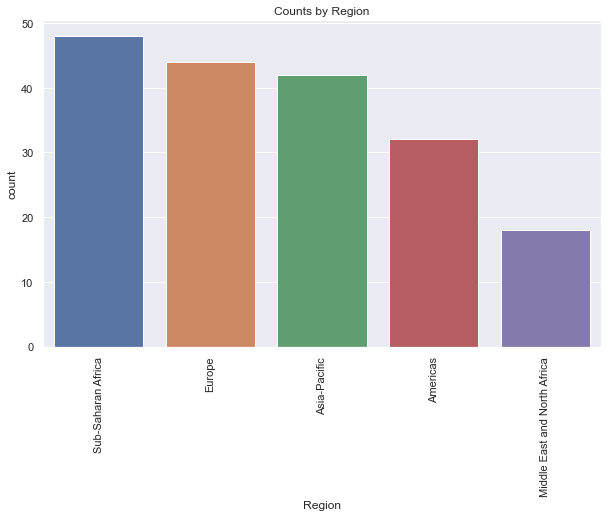

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x = data['Region'], order = data['Region'].value_counts().index)
plt.title('Counts by Region')
plt.xticks(rotation=90)


Most of the countries are from the Sub-Saharan Africa area, and the least are from the Middle East and North Africa.

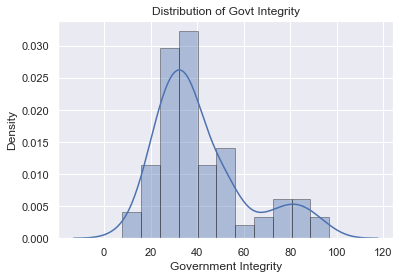

In [55]:
sns.distplot(data['Government Integrity'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Govt Integrity');

Most countries appear to have low government integrity, with the distribution being right-skewed.

Text(0.5, 1.0, 'Distribution of Inflation (%)')

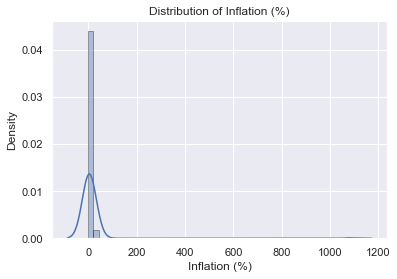

In [56]:
sns.distplot(data['Inflation (%)'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Inflation (%)')

Most countries have very low to no inflation. There appears to be an outlier above 1000 %.

Text(0.5, 1.0, 'Distribution of Population (Millions)')

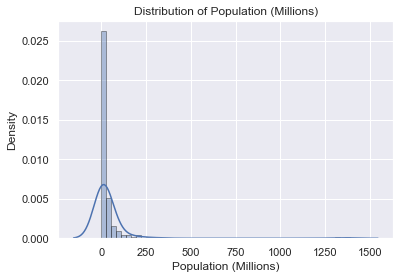

In [57]:
sns.distplot(data['Population (Millions)'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Population (Millions)')

Population is highly skewed to the right with a couple of countries as outliers, India and China with populations over a billion.

Text(0.5, 1.0, 'Distribution of Monetary Freedom)')

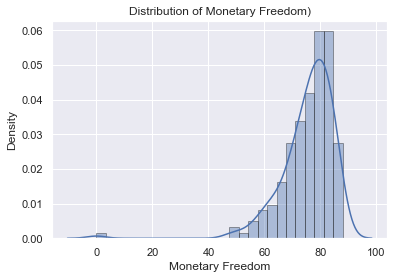

In [58]:
sns.distplot(data['Monetary Freedom'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Distribution of Monetary Freedom)')

Monetary freedom is highly skewed to the left and has few observations with no Monetary Freedom.

## Perform bivariate analysis

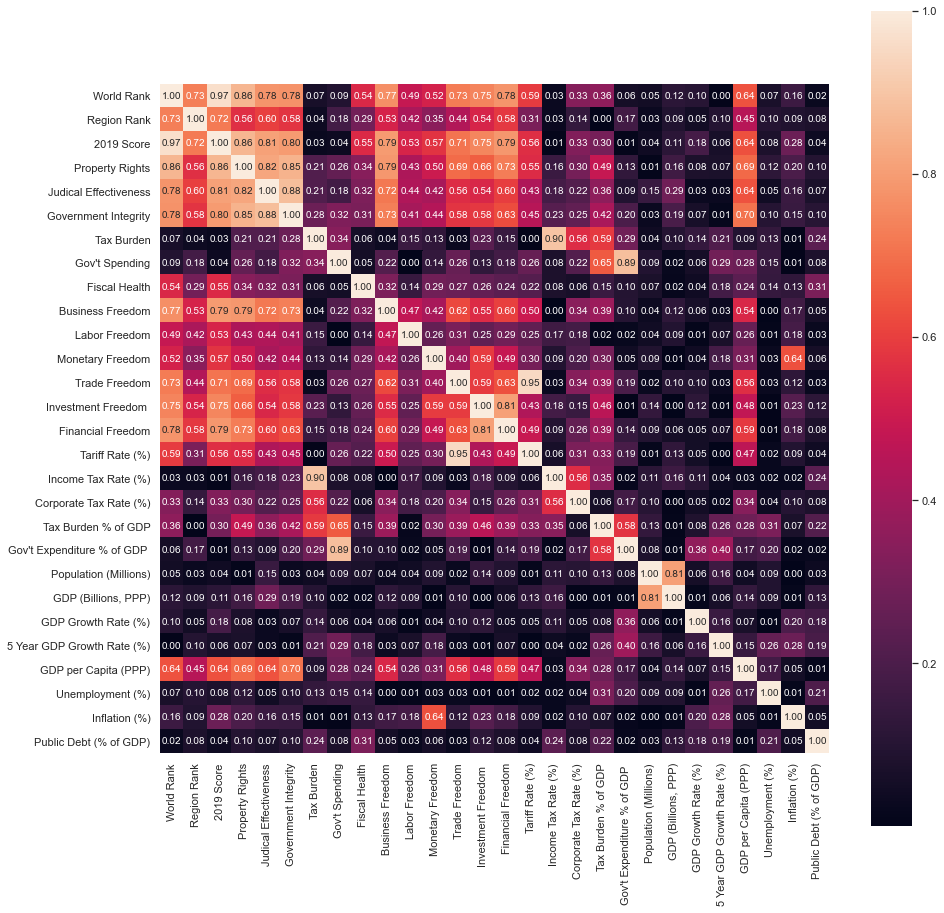

In [59]:
drop_colums = ['Country','CountryID', 'Region']
data2 = data.drop(columns=drop_colums)
plt.figure(figsize=(15,15))
sns.heatmap(abs(data2.corr()),annot=True,square=True,fmt=".2f")
plt.show()

There is some high correlation with world ranking, 2019 score, property rights, judicial effectiveness, government integrity, business freedom, trade freedom, investment freedom, and financial freedom. These variables possibly play a huge role in getting a high world ranking. Gov't Expenditure % of GDP and Gov't Spending is highly correlated. Tariff Rate and Trade Freedom is also highly correlated.

Public Debt %, FDI inflow, inflation, Unemployment, 5 year GDP growth Rate, GDP Growth Rate, Population in millions, and any variable with little correlation with the other variables I will drop to reduce dimensions.


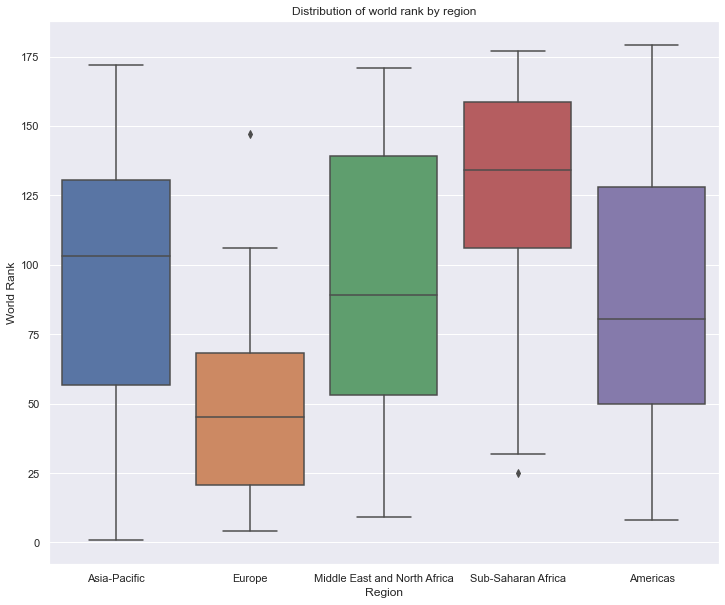

In [60]:
plt.figure(figsize=(12,10))
plt.title('Distribution of world rank by region')
sns.boxplot(data['Region'], data['World Rank']);

Mean values seem to be different but for the most part each region has similar ranges in world rank scores.

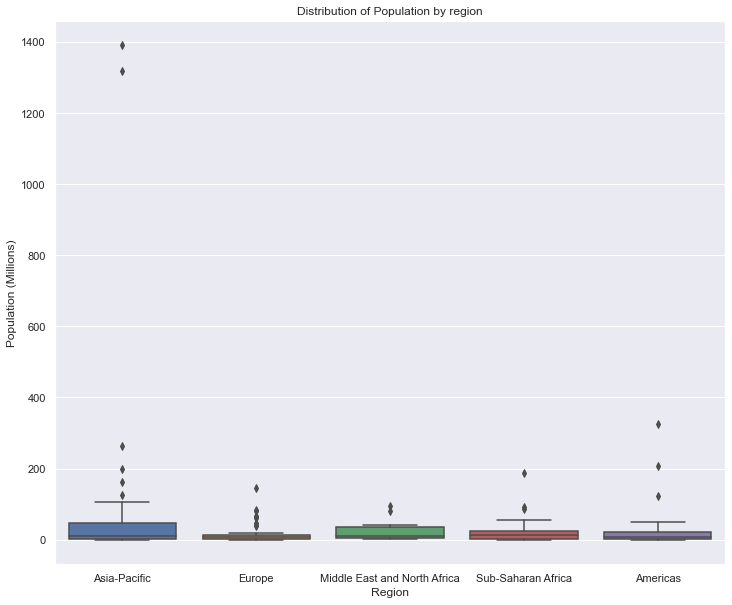

In [61]:
plt.figure(figsize=(12,10))
plt.title('Distribution of Population by region')
sns.boxplot(data['Region'], data['Population (Millions)']);

Asian region has more countries with higher populations but there seems to be an overlap on ranges for each region.

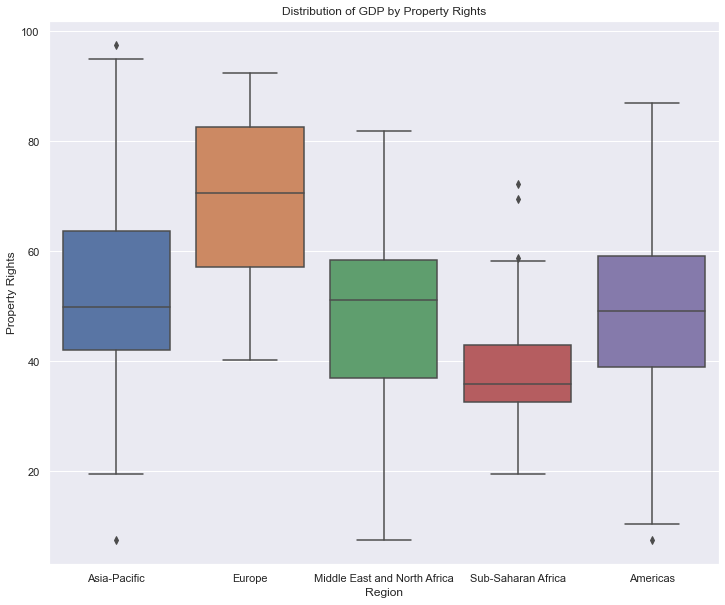

In [62]:
plt.figure(figsize=(12,10))
plt.title('Distribution of GDP by Property Rights')
sns.boxplot(data['Region'], data['Property Rights']);

The ranges of property rights overlap each region.

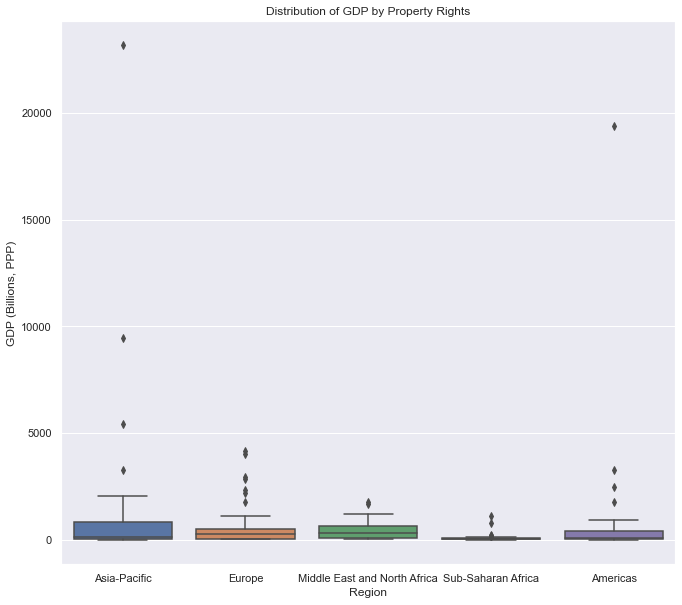

In [63]:
plt.figure(figsize=(11,10))
plt.title('Distribution of GDP by Property Rights')
sns.boxplot(data['Region'], data['GDP (Billions, PPP)']);

Asia-Pacific seems to have the upper values for GDP, but for the most part the ranges appear to be about the same.

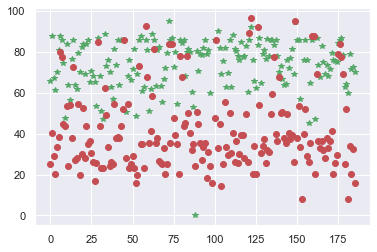

In [80]:
#Plot GDP per capita v/s Government Integrity

plt.plot(df['Trade Freedom'],'g*', df['Government Integrity'], 'ro')
plt.show();

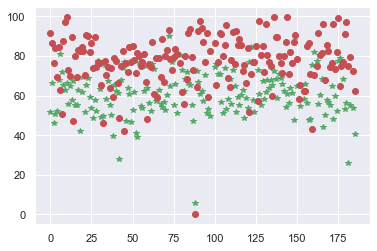

In [81]:
# Plot GDP per capita v/s Government Integrity

plt.plot(df['2019 Score'],'g*', df['Tax Burden'], 'ro')
plt.show();

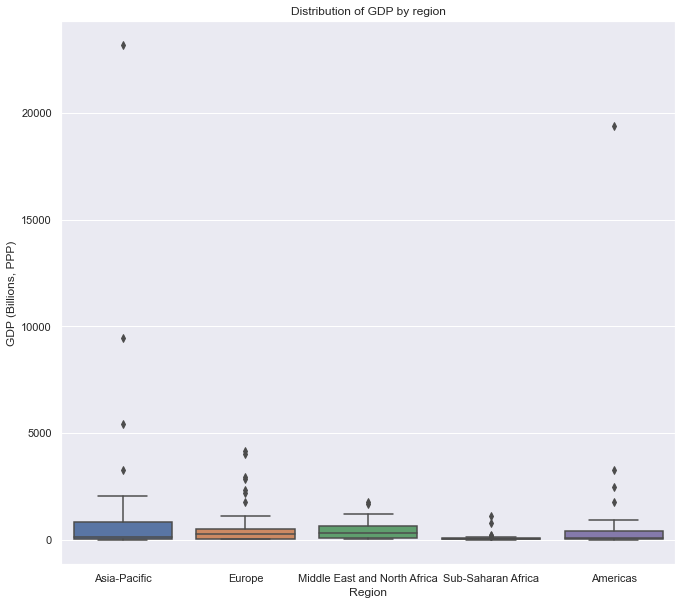

In [64]:
plt.figure(figsize=(11,10))
plt.title('Distribution of GDP by region')
sns.boxplot(data['Region'], data['GDP (Billions, PPP)']);

### Clean up Data

* Deal with missing Data

In [65]:
data[data['World Rank'].isnull()].T

,78,98,153,161,183
CountryID,77,96,184,159,181
Country,Iraq,Libya,Somalia,Syria,Yemen
Region,Middle East and North Africa,Middle East and North Africa,Sub-Saharan Africa,Middle East and North Africa,Middle East and North Africa
World Rank,NaN,NaN,NaN,NaN,NaN
Region Rank,NaN,NaN,NaN,NaN,NaN
2019 Score,NaN,NaN,NaN,NaN,NaN
Property Rights,37.0,7.6,33.7,37.0,19.6
Judical Effectiveness,12.3,24.4,26.6,24.4,22.2
Government Integrity,20.3,15.8,7.9,20.3,20.3
Tax Burden,NaN,NaN,NaN,NaN,NaN


Based on the statistical summary a handful of skewed variables, so I was using the median for imputation of missing data. Drop ID variable, categorical variables, and variables with little correlation to the others.

In [66]:

drop_colums = ['CountryID','Country','Region', 'Public Debt (% of GDP)', 'FDI Inflow (Millions)',
              'Inflation (%)', 'Unemployment (%)', '5 Year GDP Growth Rate (%)', 'GDP Growth Rate (%)',
               'Population (Millions)', 'Tax Burden', "Gov't Spending", 'GDP (Billions, PPP)']
data_drop = data.drop(columns=drop_colums)
imputer = SimpleImputer(missing_values=np.nan, strategy='median') # replace missing with median


cols = list(data_drop)   # Keep column names
data_trans = imputer.fit_transform(data_drop) # replace missing with median but lose column names
df_ = pd.DataFrame(data_trans) # make array data base again
df_.columns = cols  # add column names back
df_.T


,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
World Rank,152.0,52.0,171.0,156.0,148.0,47.0,5.0,31.0,60.0,76.0,...,7.0,12.0,40.0,140.0,116.0,179.0,128.0,90.0,138.0,175.0
Region Rank,39.0,27.0,14.0,33.0,26.0,24.0,4.0,16.0,13.0,15.0,...,3.0,2.0,6.0,36.0,26.0,32.0,30.0,19.0,27.0,45.0
2019 Score,51.5,66.5,46.2,50.6,52.2,67.7,80.9,72.0,65.4,62.9,...,78.9,76.8,68.6,53.3,56.4,25.9,55.3,60.8,53.6,40.4
Property Rights,19.6,54.8,31.6,35.9,47.8,57.2,79.1,84.2,59.1,42.2,...,92.3,79.3,68.3,49.8,65.9,7.6,49.8,19.6,45.0,29.7
Judical Effectiveness,29.6,30.6,36.2,26.6,44.5,46.3,86.5,71.3,53.1,46.9,...,85.9,78.6,58.9,34.3,36.4,13.1,40.3,22.2,35.6,24.8
Government Integrity,25.2,40.4,28.9,20.5,33.5,38.6,79.9,77.4,44.7,43.7,...,83.8,77.4,69.2,25.2,51.9,7.9,34.0,20.3,32.3,15.8
Fiscal Health,99.3,80.6,18.7,58.2,33.0,53.0,86.2,85.5,89.4,65.7,...,68.6,53.1,69.9,98.7,15.3,17.6,40.7,0.0,12.3,23.7
Business Freedom,49.2,69.3,61.6,55.7,56.4,78.3,88.3,74.9,69.5,68.5,...,92.9,83.8,74.3,72.5,52.4,33.9,63.5,45.1,71.1,33.4
Labor Freedom,60.4,52.7,49.9,58.8,46.9,71.4,84.1,68.7,63.9,67.5,...,73.5,89.4,71.9,58.7,58.8,28.0,62.8,49.8,46.0,43.3
Monetary Freedom,76.7,81.5,74.9,55.4,60.2,77.8,86.6,81.5,63.0,78.1,...,81.2,76.6,72.9,58.9,75.0,0.0,68.9,61.5,70.3,72.4


Normalize values so no one variable can out weight the other.

In [67]:
df_X = df_.drop(['World Rank', 'Region Rank'], axis = 1)#World rank is like a depended variable
                                              #Region rank is like a depended variable too
df_Y = df_[['World Rank']]


data_score = df_X.apply(zscore)


### Principal Component Analysis

- Objective: Select the minimum number of principal components that can explain at least 95% of variance

In [68]:
Cov_Matrix = np.cov(data_score.T)
print('Covariance Matrix \n', Cov_Matrix)

Covariance Matrix 
 [[ 1.00546448  0.84300548  0.79431938  0.78264305  0.53723359  0.77770153
   0.53499044  0.55108482  0.69898003  0.72585579  0.79325294 -0.55343106
   0.00954972 -0.32790968  0.30004503  0.0057529   0.63807798]
 [ 0.84300548  1.00546448  0.82769416  0.85946434  0.33883695  0.79227807
   0.42745399  0.50285959  0.67616277  0.66369322  0.70770262 -0.5385491
   0.15318782 -0.29781212  0.47932263  0.13240567  0.69029877]
 [ 0.79431938  0.82769416  1.00546448  0.88666209  0.31187412  0.72237464
   0.43721667  0.41666627  0.5486913   0.53398759  0.58154453 -0.42036161
   0.18054156 -0.21730272  0.35636519  0.09247058  0.64121497]
 [ 0.78264305  0.85946434  0.88666209  1.00546448  0.30078493  0.73507954
   0.40961617  0.43855893  0.56785179  0.57790583  0.61235964 -0.44009081
   0.22179519 -0.25248485  0.41923482  0.19925399  0.70489495]
 [ 0.53723359  0.33883695  0.31187412  0.30078493  1.00546448  0.30582922
   0.14520856  0.27419843  0.25840346  0.24539874  0.2311369  -

In [86]:
eig_vals, eig_vecs = np.linalg.eig(Cov_Matrix)

In [87]:
Tot = sum(eig_vals)
var_exp = [( i /Tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print(extra['Bold'],extra['Blue'],extra['Underline'],"\n Cumulative Variance Explained")
print("\n")
print(extra['End'],cum_var_exp) # it seems 11 PC will explain at least 95 percent variability. 

   
 Cumulative Variance Explained


 [ 46.42159623  57.09067483  65.84520849  71.96265839  77.13666147
  82.1371319   86.50774069  89.49277793  92.31792546  94.22904779
  95.92717352  97.25292265  98.29354212  99.04968417  99.59893763
  99.85372788 100.        ]


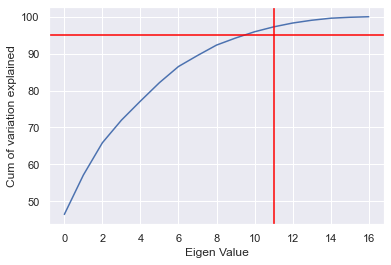

In [88]:
plt.plot(cum_var_exp)
plt.axvline(x=11, color = 'red')
plt.axhline(y=95,color = 'red')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()


It appears that 11 principal componetns can explain 95 percent of the variation. 

- Transform the data to 11 principal components

In [89]:
pca11 = PCA(n_components=11)
pca11.fit(data_score)

print(pca11.explained_variance_ratio_)
Xpca = pca11.transform(data_score)

[0.46421596 0.10669079 0.08754534 0.0611745  0.05174003 0.0500047
 0.04370609 0.02985037 0.02825148 0.01911122 0.01698126]


In [90]:
pca11 = PCA(n_components=3) #        Transform the data with only three principle components,
pca11.fit(data_score)       #        since those components explain a majority of the variability.
pca_X = pca11.transform(data_score)
pcaX = pd.DataFrame(pca_X)


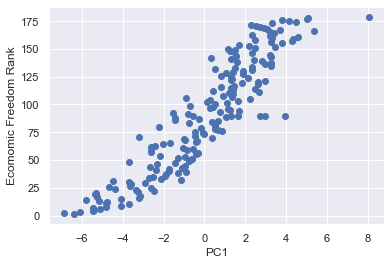

In [91]:
plt.scatter(x=pcaX[[0]],y= df_Y)
plt.ylabel('Ecomomic Freedom Rank')
plt.xlabel('PC1')
plt.show()

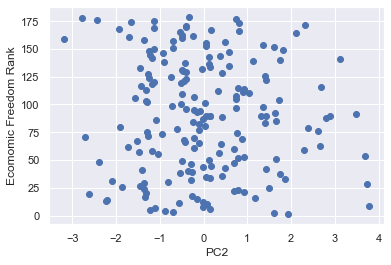

In [92]:
plt.scatter(x=pcaX[[1]],y= df_Y)
plt.ylabel('Ecomomic Freedom Rank')
plt.xlabel('PC2')
plt.show()

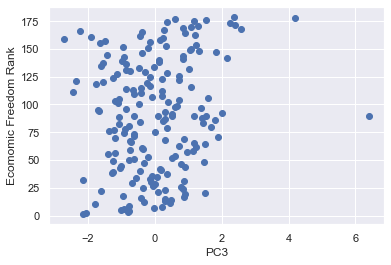

In [93]:
plt.scatter(x=pcaX[[2]],y= df_Y)
plt.ylabel('Ecomomic Freedom Rank')
plt.xlabel('PC3')
plt.show()

## Perform clustering

Text(0.5, 1.0, 'Elbow Method plot')

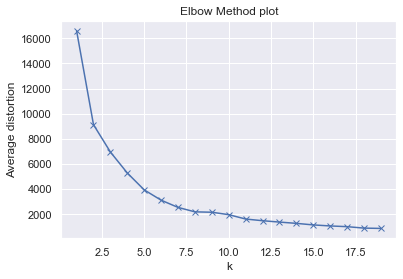

In [94]:

clusters=range(1,20) # have a range of possiable clusters
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_X)
    prediction=model.predict(df_X)
    meanDistortions.append(sum(np.min(cdist(df_X, model.cluster_centers_, 'euclidean'), axis=1)) / df_X
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Elbow Method plot')

Text(0.5, 1.0, 'Elbow Method plot')

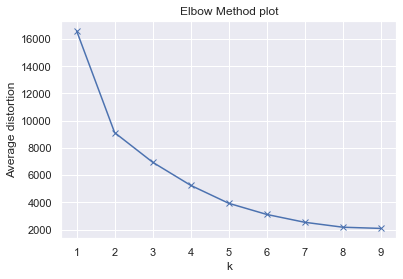

In [95]:
clusters=range(1,10) ############## make range smaller
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_X)
    prediction=model.predict(df_X)
    meanDistortions.append(sum(np.min(cdist(df_X, model.cluster_centers_, 'euclidean'), axis=1)) / df_X
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Elbow Method plot')

In [112]:
# Selecting 4 clusters based off of plot
kmeans = KMeans(n_clusters=4, n_init = 15, random_state= seed)

In [115]:
kmeans.fit(data_score)

KMeans(n_clusters=4, n_init=15, random_state=1729)

In [116]:
centroids = kmeans.cluster_centers_

In [117]:
centroid_df = pd.DataFrame(centroids, columns = list(data_score) )

###### Add group to data set

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['Group'])) ########## column name

df_labels['Group'] = df_labels['Group'].astype('category')  ############## make group categorical


df_labeled = df_.join(df_labels)                        # Joining the label dataframe with the data frame.

df_A = (df_labeled.groupby(['Group'] , axis=0)).head()  # the groupby creates a groupeddataframe that needs 

df_A.head()

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP per Capita (PPP),Group
0,152.0,39.0,51.5,19.6,29.6,25.2,99.3,49.2,60.4,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,1958.0,2
1,52.0,27.0,66.5,54.8,30.6,40.4,80.6,69.3,52.7,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,12507.0,3
2,171.0,14.0,46.2,31.6,36.2,28.9,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,15237.0,2
3,156.0,33.0,50.6,35.9,26.6,20.5,58.2,55.7,58.8,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,6753.0,2
4,148.0,26.0,52.2,47.8,44.5,33.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,7.5,35.0,30.0,30.8,41.0,20876.0,1


In [118]:
df_labeled['Group'].value_counts()  # Check counts for each group

1    66
3    45
2    44
0    29
Name: Group, dtype: int64

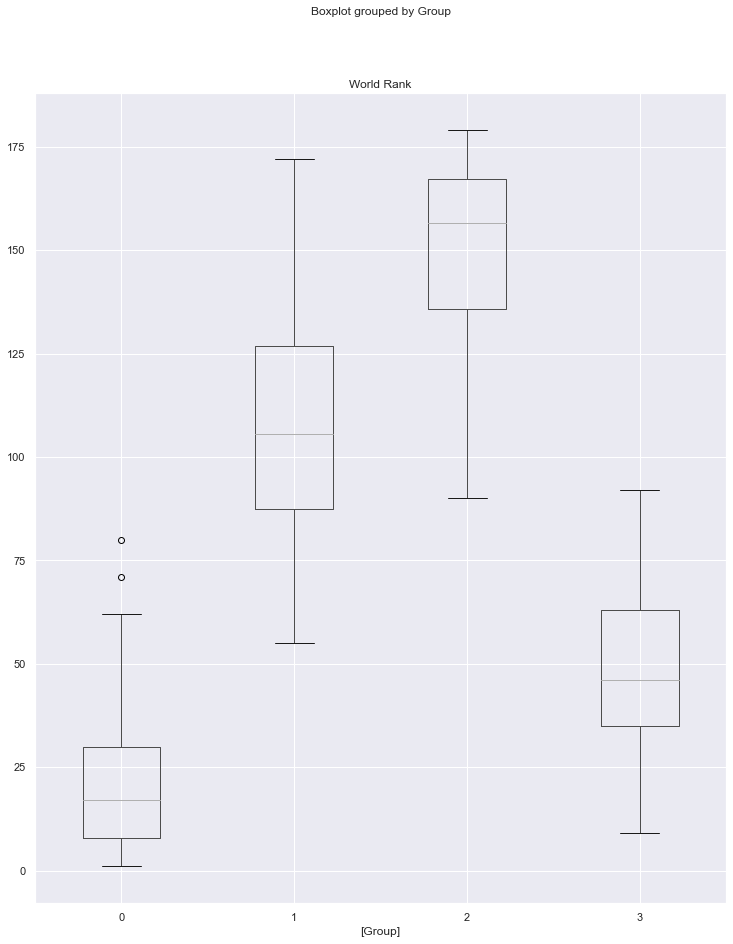

In [123]:
df_ec = df_labeled[['World Rank', 'Group']]
df_ec.boxplot(by = 'Group', figsize=(12, 15));

Group 0 is mainly made of countries with high world rank compared to the other groups. Group 1 has the lowest rank countries, while group 2 and 3 are in the middle.

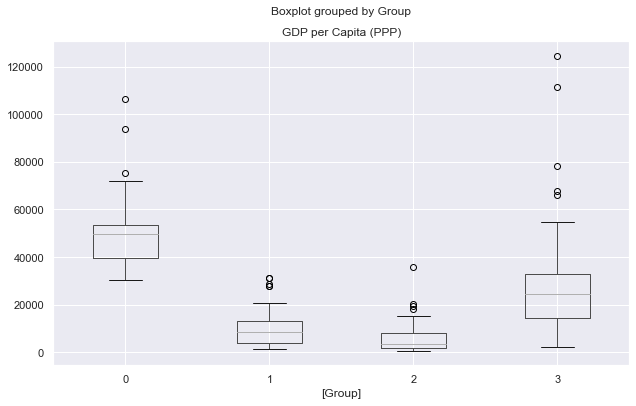

In [124]:
df_ec = df_labeled[['GDP per Capita (PPP)', 'Group']]
df_ec.boxplot(by = 'Group', figsize=(10, 6)); 

Group 1 and 2 have lower GDP per Capita (PPP) than the other two groups.

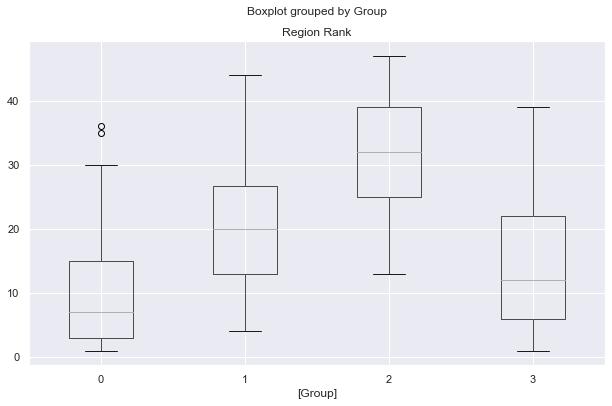

In [126]:
df_ec = df_labeled[['Region Rank', 'Group']]
df_ec.boxplot(by = 'Group', figsize=(10, 6));

Group one seems to have more countries with higher region rank thank the other groups.

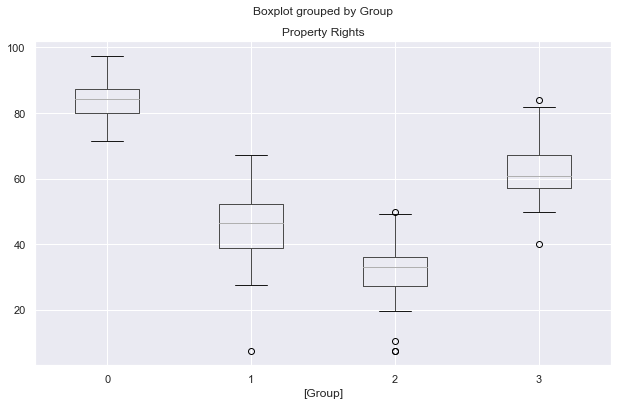

In [127]:
df_ec = df_labeled[['Property Rights', 'Group']]
df_ec.boxplot(by = 'Group', figsize=(10, 6));

Group 0 has higher property right values than the other groups. Group 1 has the lower end, and group 2 and 3 are mid range.

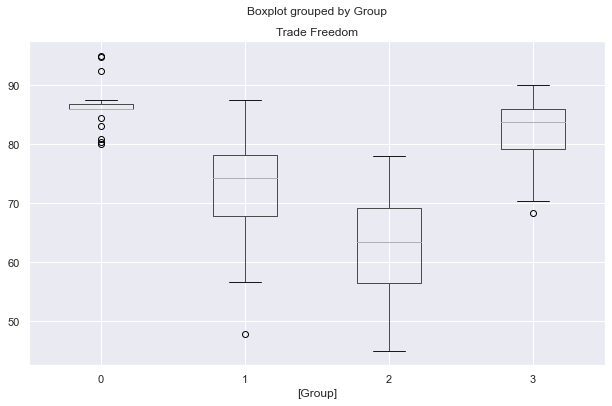

In [128]:
df_ec = df_labeled[['Trade Freedom', 'Group']]
df_ec.boxplot(by = 'Group', figsize=(10, 6));

Group 0 has higher trade freedom values than the other groups, with very little variability, compared to the other groups. Group 2 and 3 aren't two far behind group 0 but with much varability. Group 1 seems to be compressed with countries with lower trade freedoms.

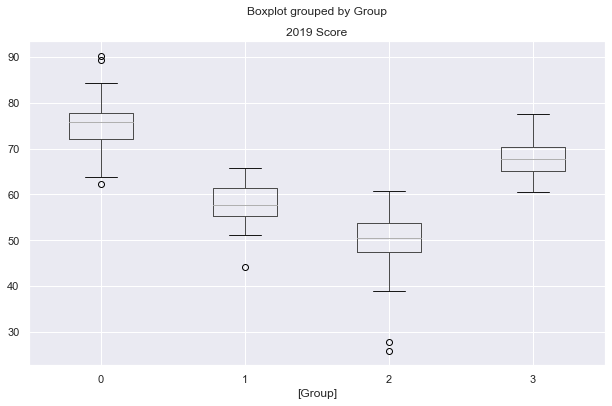

In [129]:
df_ec = df_labeled[['2019 Score', 'Group']]
df_ec.boxplot(by = 'Group', figsize=(10, 6));

Group 0 has higher 2019 score than the other groups. Group 2 has values with in the range of 3 but not a disbursed.

## Summary of findings

World rank is highly influenced by the 2019 score, property rights, judicial effectiveness, government integrity, business freedom, trade freedom, investment freedom, and financial freedom.
Between the five regions, they have similar ranges when it comes to economic freedom. In other words, each region has its share of well-developed countries and not-so-developed countries. One thing unexpected about this data set was its completeness. With all these countries around the world, with their different backgrounds, there aren’t that many missing observations. Over a period countries change in relative performance over economic performance. Mostly higher economic freedom reaps benefits in economic prosperity, but not always.

 I also found a strong correlation between PC1 and world rank. The others don't have that strong of a correlation. If I was later to build a model to help predict economic freedom, PC1 would be a good hyperparameter.
From the cluster analysis, there is a clear difference in world rank between groups 0 and 
* 1. Group 0 having more countries with a high world rank, higher property    
     rights, and trade rights. 
* 2. GDP per capita is lower in groups 2 and 3 than groups 0 and 4. 
* 3. Since there is an overlap with groups 3 and 4, it is possible to maybe 
     have those two groups put together in future analysis.